In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
gn = pd.read_csv('E:/Desktop/gn.csv',header = None)

(array([ 2.,  5., 14., 22., 22., 17., 23., 10.,  4.,  1.]),
 array([0.04358747, 0.13894826, 0.23430906, 0.32966986, 0.42503066,
        0.52039146, 0.61575225, 0.71111305, 0.80647385, 0.90183465,
        0.99719545]),
 <BarContainer object of 10 artists>)

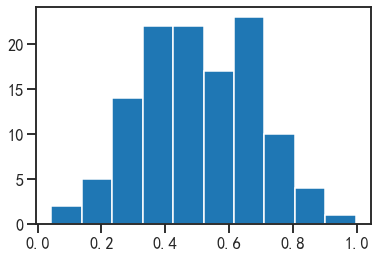

In [23]:
gn = np.zeros(120)
for i in range(120):
    gn[i] = np.random.normal(0.5, 0.2, 1)
    while gn[i] < 0 or gn[i] > 1:
        gn[i] = np.random.normal(0.5, 0.2, 1)
plt.hist(gn)

(array([ 4.,  4., 14., 25., 24., 21., 22.,  5.,  0.,  1.]),
 array([0.11897713, 0.20666658, 0.29435602, 0.38204546, 0.4697349 ,
        0.55742435, 0.64511379, 0.73280323, 0.82049267, 0.90818211,
        0.99587156]),
 <BarContainer object of 10 artists>)

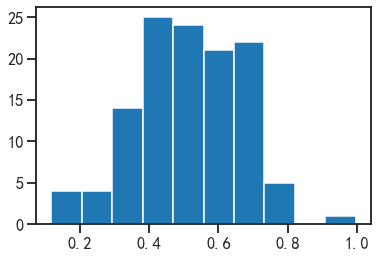

In [24]:
gn = np.zeros(120)
for i in range(120):
    gn[i] = np.random.normal(0.5, 0.15, 1)
    while gn[i] < 0 or gn[i] > 1:
        gn[i] = np.random.normal(0.5, 0.15, 1)
plt.hist(gn)

In [16]:
gn

array([0.567363  , 0.4915152 , 0.33475957, 0.56435637, 0.4085671 ,
       0.53498783, 0.50980876, 0.59201331, 0.54162481, 0.56882987,
       0.49672908, 0.55425445, 0.49941122, 0.36382549, 0.46825487,
       0.26732355, 0.58795543, 0.43140412, 0.38057676, 0.37798072,
       0.41489166, 0.567374  , 0.56358357, 0.58352749, 0.51819929,
       0.62322907, 0.40031582, 0.41957622, 0.68332299, 0.50840462,
       0.45337737, 0.45412086, 0.43763053, 0.56451329, 0.31484194,
       0.58433423, 0.60938668, 0.54565758, 0.52731308, 0.30831795,
       0.51629991, 0.59204371, 0.43327245, 0.49533381, 0.4386229 ,
       0.46250661, 0.55169408, 0.55389145, 0.5001525 , 0.48922137,
       0.56903469, 0.64807799, 0.59054561, 0.66301395, 0.50530196,
       0.33221332, 0.46939536, 0.48384691, 0.61274837, 0.49721913,
       0.50290107, 0.41611166, 0.40023908, 0.51968534, 0.3432977 ,
       0.50768129, 0.52294938, 0.61644726, 0.50135606, 0.38682998,
       0.43014801, 0.37166726, 0.39656479, 0.58587217, 0.38713

In [8]:
###计算分位数
print(np.median(gn[0]))
print(np.percentile(gn[0],25))
print(np.percentile(gn[0],75))

print(np.median(gn[1]))
print(np.percentile(gn[1],25))
print(np.percentile(gn[1],75))

print(np.median(gn[2]))
print(np.percentile(gn[2],25))
print(np.percentile(gn[2],75))

0.7473308243877592
0.7473308243877592
0.7473308243877592
0.6451044735313162
0.6451044735313162
0.6451044735313162
0.473983688942831
0.473983688942831
0.473983688942831


In [9]:
class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', 
                 legends=None, xlabel=None, ylabels=None, fsize=(10, 10), df_line=1):
        """
        :x_data: 数据x列表
        : num_bins: x的分组数
        : linetype: 累计频率曲线的样式，默认为红色实心点
        : legends: 图例名，默认为 "线性拟合结果", "实测值"
        : xlabel:x坐标轴标题名，默认为 "数据x"
        : ylabels:双y坐标轴标题名，默认为 "计数", "累计频率"
        : df_line:是否显示累计频率曲线
        """
        if legends is None:
            legends = ["the frequency of g(n)", "cumulative frequencies"]
        if xlabel is None:
            xlabel = "g(n)"
        if ylabels is None:
            ylabels = ["the frequency of g(n)", "cumulative frequencies"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.legends = legends
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_legend(self, new_legends):
        # 将图例名称改为new_legends
        self.legends = new_legends

    def change_ylabel(self, new_labels):
        # 将双y轴坐标轴标题改为new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # 将x轴坐标轴标题改为new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # 将累计频率线的格式改为new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # 画布大小
        # 利用seaborn库对字体大小进行统一设置，为fgsize[1]的0.12倍，即画布纵向大小为1000时，font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)
        plt.rcParams['font.sans-serif'] = ['SimHei']

        # 设置画布
        fig, ax = plt.subplots(figsize=fs)

        # ax:绘制频率直方图，不可选
        n, bins, patches = ax.hist(self.x_data, self.num_bins, rwidth=0.9, label=self.legends[0])
        
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabels[0])

        # ax2:绘制累计频率曲线，可选
        if self.df_line:
            leiji_n = [sum(n[:i]) / len(self.x_data) for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.5, markeredgecolor='k', label=self.legends[1])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1])

        # 显示多图例
#        fig.legend(loc=4 , bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        fig.tight_layout()
        
        plt.show()
        fig.savefig('E:/Desktop/gn30min1.svg')

TypeError: object of type 'numpy.float64' has no len()

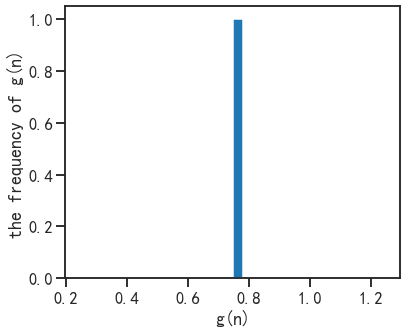

In [10]:
if __name__ == "__main__":
    np.random.seed(19680801)
    iqs = gn[0]  # 待绘制直方图的数据
    bins = 30  # 数据
    plot1 = Histplot(iqs, num_bins=bins, fsize=(6, 5))
    plot1.draw_plot()

#plot1.savefig('E:/Desktop/gn10min.svg')

AttributeError: 'Figure' object has no attribute 'xticks'

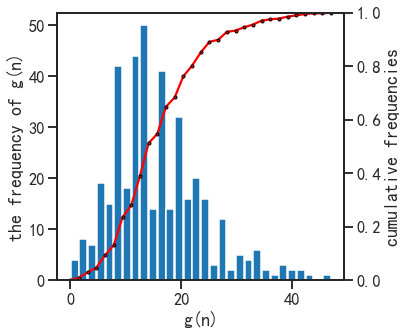

In [86]:
if __name__ == "__main__":
    np.random.seed(19680801)
    iqs = gn[1]  # 待绘制直方图的数据
    bins = 30  # 数据
    plot1 = Histplot(iqs, num_bins=bins, fsize=(6, 5))
    plot1.draw_plot()

#plot1.savefig('E:/Desktop/gn30min.svg')

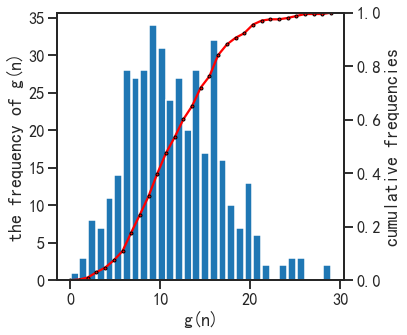

In [78]:
if __name__ == "__main__":
    np.random.seed(19680801)
    iqs = gn[2]  # 待绘制直方图的数据
    bins = 30  # 数据
    plot1 = Histplot(iqs, num_bins=bins, fsize=(6, 5))
    plot1.draw_plot()

#plot1.savefig('E:/Desktop/gn50min.svg')